# Multiples Notebook

### Setup

In [1]:
# ---- Setup (once) ----
from src.mult.multiples import build_multiples_for_ticker, multiples_with_peers, plot_trends
from src.sec_helpers.helpers import make_session

USER_AGENT = "severin.spagnola@sjsu.edu"  # Email per SEC compliance requests
session = make_session(USER_AGENT)

TICKER = "AAPL"
PEERS  = ["MSFT","GOOGL","AMZN","NVDA"]
YEARS_BACK = 5


### Important Variables

,EV_EBITDA,P_S,P_FCF
fy,,,
2021,25.12,8.03,34.03
2022,16.69,5.30,22.08
2023,23.81,7.59,32.04
2024,28.38,9.57,37.69
2025,28.29,9.68,38.70


,EV_EBITDA,EV_EBITDA_median,EV_EBITDA_mean,P_S,P_S_median,P_S_mean,P_FCF,P_FCF_median,P_FCF_mean
fy,,,,,,,,,
2021,25.12,2.25,2.25,8.03,0.43,3.95,34.03,NaN,NaN
2022,16.69,11.26,11.26,5.30,3.15,4.22,22.08,7.05,7.05
2023,23.81,20.44,20.44,7.59,5.02,6.42,32.04,26.78,26.78
2024,28.38,14.71,14.71,9.57,6.19,7.19,37.69,12.59,12.59
2025,28.29,56.01,56.01,9.68,24.46,24.46,38.70,71.05,71.05


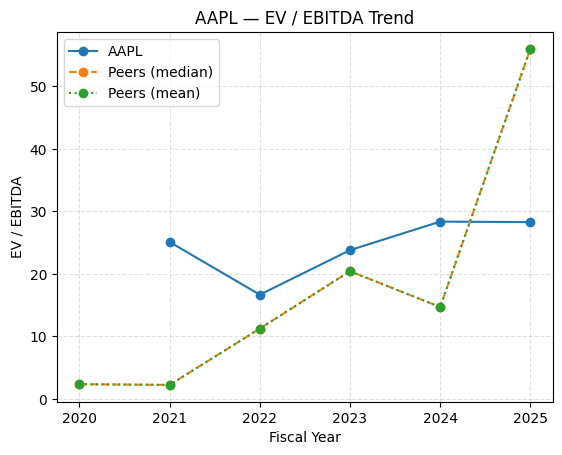

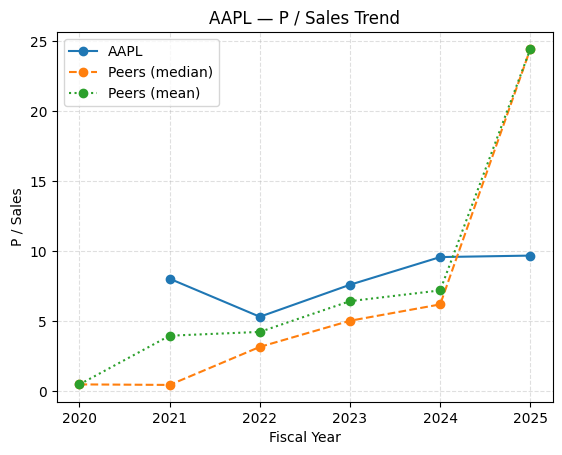

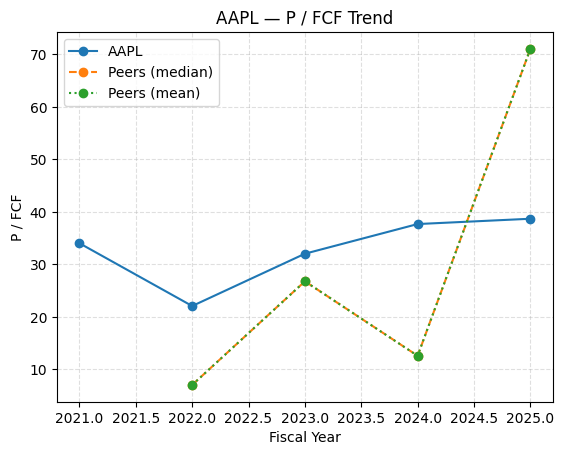

In [2]:
# ---- Quick analysis ----
comp, stats = multiples_with_peers(TICKER, PEERS, years_back=YEARS_BACK, session=session)

display(comp[["EV_EBITDA","P_S","P_FCF"]].round(2))
if not stats.empty:
    out = comp.join(stats, how="left")
    display(out[[
        "EV_EBITDA","EV_EBITDA_median","EV_EBITDA_mean",
        "P_S","P_S_median","P_S_mean",
        "P_FCF","P_FCF_median","P_FCF_mean"
    ]].round(2))

plot_trends(comp, stats, label_ticker=TICKER)


### Check what data was received if something overlaps or appears missing

In [ ]:
display(stats[[c for c in stats.columns if c.startswith("P_S_")]])
display(stats[[c for c in stats.columns if c.startswith("P_FCF_")]])
display(stats[[c for c in stats.columns if c.startswith("EV_EBITDA_")]])

['EV_EBITDA_median', 'EV_EBITDA_mean', 'P_S_median', 'P_S_mean', 'P_FCF_median', 'P_FCF_mean']


,P_S_median,P_S_mean
fy,,
2020,0.466379,0.466379
2021,0.428834,3.949258
2022,3.148514,4.221506
2023,5.018407,6.420568
2024,6.187640,7.190193
2025,24.463409,24.463409


,P_FCF_median,P_FCF_mean
fy,,
2020,NaN,NaN
2021,NaN,NaN
2022,7.045356,7.045356
2023,26.780057,26.780057
2024,12.592986,12.592986
2025,71.047265,71.047265


,EV_EBITDA_median,EV_EBITDA_mean
fy,,
2020,2.357965,2.357965
2021,2.245074,2.245074
2022,11.260061,11.260061
2023,20.437634,20.437634
2024,14.714367,14.714367
2025,56.011936,56.011936
